In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

from model import SIRModel

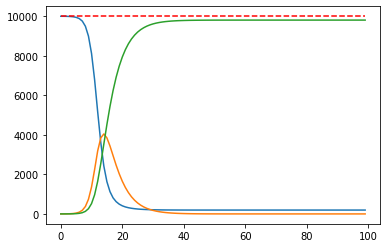

In [2]:
BETA=1.0
GAMMA=1/4
model=SIRModel(beta=BETA,gamma=GAMMA)
t=np.arange(0,100)
S0=10000
I0=1
R0=0
y_0=[S0,I0,R0]
y_t=model.predict(t,y_0)

plt.plot(t,y_t[0])
plt.plot(t,y_t[1])
plt.plot(t,y_t[2])
plt.plot(t,y_t[0]+y_t[1]+y_t[2],"r--")
plt.show()

In [3]:
model.beta_=0.90
model.gamma_=0.22
N=S0+I0
I=y_t[1]
R0=y_t[2][0]
model.fit(t, y_t, N)
print(model)
assert np.allclose(model.params, (BETA, GAMMA))

p=0.9999999999999999 ; p=0.25


In [4]:
param_names=("BETA","GAMMA")
true_parms=(BETA,GAMMA)
for i, (p,true_p, name) in enumerate(zip(model.params,true_parms,param_names)):
    print( f"true value {name} = {true_p} ~ {p}  +/- {np.sqrt(model.params_cov_[i,i])}")

true value BETA = 1.0 ~ 0.9999999999999999  +/- 7.788047323887707e-17
true value GAMMA = 0.25 ~ 0.25  +/- 5.872822759184539e-17


# Fit model à un jeu de donnée

In [5]:
#chargement et transformation des données 

data_dir = 'data'

#Load data
tests_depistage_latest = pd.read_csv(os.path.join(data_dir,
                                                  'donnees-tests-covid19-labo-quotidien-2020-05-06-19h00.csv'),
                                     sep=';')

hospital_latest = pd.read_csv(os.path.join(data_dir, 'donnees-hospitalieres-covid19-2020-05-05-19h00.csv'),
                              sep=';')

tests_depistage_latest['jour'] =  pd.to_datetime(tests_depistage_latest['jour'], format='%Y-%m-%d')
aggr_tests_latest=tests_depistage_latest.groupby(['jour']).sum()
aggr_tests_latest['nb_pos']=aggr_tests_latest['nb_pos'].cumsum() * 7

hospital_latest['jour'] =  pd.to_datetime(hospital_latest['jour'], format='%Y-%m-%d')
aggr_hospital_latest=hospital_latest.groupby(['jour']).sum()
aggr_hospital_latest['recovered'] = aggr_hospital_latest[['rad', 'dc']].sum(axis=1)

data = pd.concat([aggr_tests_latest.nb_pos,
                     aggr_hospital_latest.recovered], axis=1)
data['infected'] = data.nb_pos.sub(data.recovered)
data = data['2020-03-18':'2020-05-03']
data

,nb_pos,recovered,infected
jour,,,
2020-03-18,14441.0,2062.0,12379.0
2020-03-19,21798.0,2964.0,18834.0
2020-03-20,31640.0,4018.0,27622.0
2020-03-21,35336.0,4621.0,30715.0
2020-03-22,38836.0,5439.0,33397.0
2020-03-23,56812.0,6791.0,50021.0
2020-03-24,76139.0,8700.0,67439.0
2020-03-25,95137.0,10876.0,84261.0
2020-03-26,117019.0,13206.0,103813.0


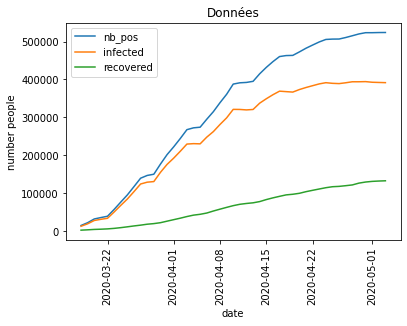

In [6]:
plot_cols = ['nb_pos', 'infected', 'recovered']
plt.title('Données')
plt.plot(data[plot_cols])
plt.ylabel('number people')
plt.xlabel('date')
plt.xticks(rotation=90)
plt.legend(plot_cols)
plt.show()

## Modele SIR

In [7]:
BETA=1.0
GAMMA=1/4
DELTA=1

#adapter t à l'intervalle de nos données 
delta=aggr_tests_latest.index.max()-aggr_tests_latest.index.min()
t=np.arange(0,aggr_tests_latest.shape[0])

N=1000000 #population en France
I=aggr_tests_latest['nb_pos']
y = [N, I, 0]
y_0 = [N, I[0], 0]

55
p=0.3301626511635718 ; p=0.046336844341131646


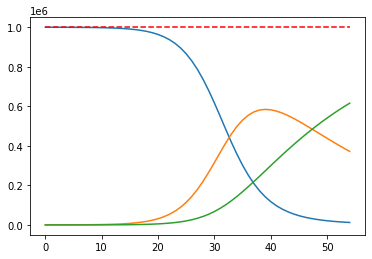

In [8]:
model=SIRModel(beta=BETA,gamma=GAMMA, N = N)
print(len(y[1]))
y_t = model.fit(t, y, N).predict(t, y_0)
print(model)

plt.plot(t,y_t[0])
plt.plot(t,y_t[1])
plt.plot(t,y_t[2])
plt.plot(t,y_t[0]+y_t[1]+y_t[2],"r--")
plt.show()

## Modele SEIR

In [9]:
from model import SEIRModel as SEIR
from model import SIRModel as SIR

p=1.0 ; p=0.25 ; p=1.0


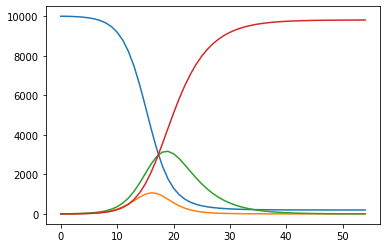

In [10]:
model = SEIR(gamma=GAMMA, beta=BETA, delta=DELTA)
y_t = model.predict(t, (10000, 10, 0, 0))
for y in y_t:
    plt.plot(t, y)
model.fit(t, y_t)
print(model)
assert np.allclose(model.params, (BETA, GAMMA, DELTA))